### 1. Write a program to demonstrate the working of the decision tree based ID3 algorithm. The given data set for building the decision tree and apply this knowledge to classify a new sample.  

| Outlook   | Temperature | Humidity | Wind   | Played football (yes/no) |
|-----------|-------------|----------|--------|---------------------------|
| Sunny     | Hot         | High     | Weak   | No                        |
| Sunny     | Hot         | High     | Strong | No                        |
| Overcast  | Hot         | High     | Weak   | Yes                       |
| Rain      | Mild        | High     | Weak   | Yes                       |
| Rain      | Cool        | Normal   | Weak   | Yes                       |
| Rain      | Cool        | Normal   | Strong | No                        |
| Overcast  | Cool        | Normal   | Strong | Yes                       |
| Sunny     | Mild        | High     | Weak   | No                        |
| Sunny     | Cool        | Normal   | Weak   | Yes                       |
| Rain      | Mild        | Normal   | Weak   | Yes                       |
| Sunny     | Mild        | Normal   | Strong | Yes                       |
| Overcast  | Mild        | High     | Strong | Yes                       |
| Overcast  | Hot         | Normal   | Weak   | Yes                       |
| Rain      | Mild        | High     | Strong | No                        |


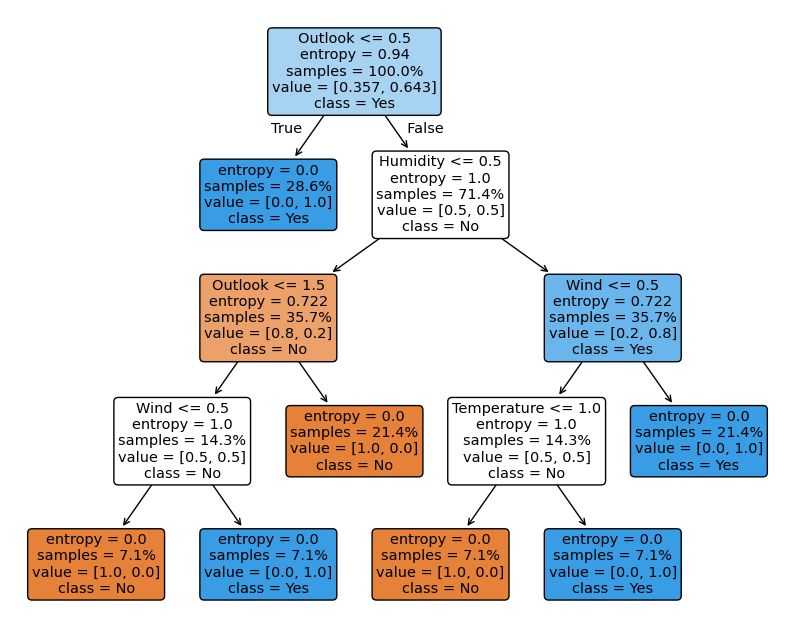

The predicted decision for the sample is: Yes


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("Datasets/football.csv")
encoders = {}
for col in df.columns:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

x = df.drop(columns=["Play"])
y = df["Play"]

clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(x, y)

plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=x.columns, class_names=encoders["Play"].classes_, filled=True, rounded=True, proportion=True)
plt.show()

sample = pd.DataFrame([["Sunny", "Mild", "Normal", "Weak"]], columns=x.columns)

for column in sample.columns:
    sample[column] = encoders[column].transform(sample[column])

predicted = encoders["Play"].inverse_transform(clf.predict(sample))

print(f"The predicted decision for the sample is: {predicted[0]}")